In [ ]:
# !pip install autodistill autodistill-grounded-sam autodistill-yolov8 supervision roboflow -q

In [1]:
from autodistill_grounded_sam import GroundedSAM
from autodistill.detection import CaptionOntology
from autodistill_yolov8 import YOLOv8
import supervision as sv
import roboflow
import random
import cv2
import os

In [5]:
base_model = GroundedSAM(ontology=CaptionOntology({"round tabs":"round tabs"}))
image_name = str(random.choice(sv.list_files_with_extensions(directory=r'D:\countbeat images\countbeat image set\jbcl')))
print(image_name)
mask_annotator = sv.MaskAnnotator()
image = cv2.imread(image_name)
classes = base_model.ontology.classes()
detections = base_model.predict(image_name)
print(detections)
# labels = [
#     f"{classes[class_id]} {confidence:0.2f}"
#     for _, _, confidence, class_id, _ , _ in detections
# ]

# annotated_frame = mask_annotator.annotate(
#     scene=image.copy(),
#     detections=detections
# )

# sv.plot_image(annotated_frame, size=(8, 8))

trying to load grounding dino directly


torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\aten\src\ATen\native\TensorShape.cpp:3596.)


final text_encoder_type: bert-base-uncased


You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possibl

D:\countbeat images\countbeat image set\jbcl\A_DFS75MG_BayerRG8_050721_182448_601.bmp


The `device` argument is deprecated and will be removed in v5 of Transformers.
torch.utils.checkpoint: the use_reentrant parameter should be passed explicitly. In version 2.5 we will raise an exception if use_reentrant is not passed. use_reentrant=False is recommended, but if you need to preserve the current default behavior, you can pass use_reentrant=True. Refer to docs for more details on the differences between the two variants.
None of the inputs have requires_grad=True. Gradients will be None
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.


Detections(xyxy=array([[     7.3751,      1.4358,      1541.2,      900.82],
       [     558.58,      15.356,      655.25,      121.56],
       [     337.78,      11.585,       425.1,      116.91],
       [     1093.1,      66.147,      1180.7,      172.18],
       [     79.214,      16.234,       163.7,      121.18]], dtype=float32), mask=array([[[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]],

       [[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
  

In [ ]:
# clear cache
# import shutil

# cache_dir = os.path.expanduser("~/.cache/torch")
# if os.path.exists(cache_dir):
#     shutil.rmtree(cache_dir)
#     print("Cleared PyTorch cache.")

In [35]:
print(detections)

Detections(xyxy=array([[     3.8599,      1.4107,      1674.3,      900.71],
       [     1355.5,      661.05,      1445.8,      766.44],
       [     1382.2,      207.67,      1486.5,      314.16]], dtype=float32), mask=array([[[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]],

       [[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]],

       [[False, False, False, ..., False, False, False],
        

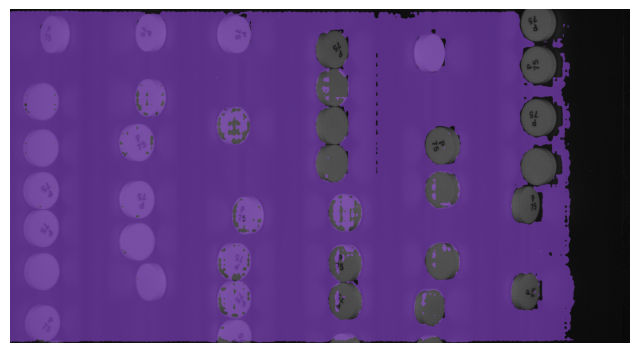

In [6]:
labels = [
    f"{classes[class_id]} {confidence:0.0f}"
    for _, _, confidence, class_id, _ , _ in detections
]

annotated_frame = mask_annotator.annotate(
    scene=image.copy(),
    detections=detections
)

sv.plot_image(annotated_frame, size=(8, 8))

In [48]:
base_model.label(input_folder="output_imgs", output_folder="./dataset")

Labeling output_imgs\A_DFS75MG_BayerRG8_050721_182238_52.jpg: 100%|██████████| 359/359 [06:41<00:00,  1.12s/it] 


Labeled dataset created - ready for distillation.


In [2]:

import cv2
import numpy as np
import os

# Function to read the contour masks from the text file
def read_masks_from_txt(txt_file, image_width, image_height):
    masks = []
    with open(txt_file, 'r') as f:
        for line in f:
            # Each line contains: class_id normalized_x1 normalized_y1 normalized_x2 normalized_y2 ...
            parts = line.strip().split()
            class_id = int(parts[0])
            
            # Convert the normalized coordinates to pixel coordinates
            points = np.array([
                [int(float(parts[i]) * image_width), int(float(parts[i + 1]) * image_height)]
                for i in range(1, len(parts), 2)
            ], dtype=np.int32)
            
            masks.append((class_id, points))
    return masks

# Function to draw contours on the image
def draw_contours(image, masks):
    for class_id, points in masks:
        # Make sure the contour is a closed polygon
        points = points.reshape((-1, 1, 2))
        # Draw the contour (green for all, you can modify colors if needed)
        cv2.polylines(image, [points], isClosed=True, color=(0, 255, 0), thickness=2)
        # Optionally, you can fill the contours with a specific color for visibility
        cv2.fillPoly(image, [points], color=(0, 255, 0))  # Fill with green color
    return image

def process_images_and_masks(image_folder, txt_folder, output_folder):
    # Get all images from the image folder
    for image_name in os.listdir(image_folder):
        if image_name.endswith(('.jpg', '.png', '.jpeg')):  # Ensure it's an image file
            image_path = os.path.join(image_folder, image_name)
            
            # Read the image
            image = cv2.imread(image_path)
            if image is None:
                print(f"Could not read image: {image_name}")
                continue

            image_height, image_width = image.shape[:2]  # Get image dimensions
            
            # Construct the path to the corresponding text file
            txt_file_name = os.path.splitext(image_name)[0] + '.txt'
            txt_file_path = os.path.join(txt_folder, txt_file_name)
            
            # Read the mask information from the text file
            if os.path.exists(txt_file_path):
                masks = read_masks_from_txt(txt_file_path, image_width, image_height)
                
                # Draw contours on the image
                image_with_contours = draw_contours(image.copy(), masks)
                
                # Save or show the image with the contours
                output_image_path = os.path.join(output_folder, image_name)
                cv2.imwrite(output_image_path, image_with_contours)
                print(f"Processed and saved: {output_image_path}")
            else:
                print(f"No text file found for {image_name}, skipping...")

# Main execution
image_folder = r'dataset\train\images'  # Set path to your images folder
txt_folder = r'dataset\train\labels'  # Set path to your text files folder
output_folder = 'D:\Autodistill\output'  # Set path where you want to save the output images

process_images_and_masks(image_folder, txt_folder, output_folder)


Processed and saved: D:\Autodistill\output\A_DFS75MG_BayerRG8_050721_182207_154.jpg
Processed and saved: D:\Autodistill\output\A_DFS75MG_BayerRG8_050721_182207_326.jpg
Processed and saved: D:\Autodistill\output\A_DFS75MG_BayerRG8_050721_182207_408.jpg
Processed and saved: D:\Autodistill\output\A_DFS75MG_BayerRG8_050721_182207_488.jpg
Processed and saved: D:\Autodistill\output\A_DFS75MG_BayerRG8_050721_182207_57.jpg
Processed and saved: D:\Autodistill\output\A_DFS75MG_BayerRG8_050721_182207_575.jpg
Processed and saved: D:\Autodistill\output\A_DFS75MG_BayerRG8_050721_182207_657.jpg
Processed and saved: D:\Autodistill\output\A_DFS75MG_BayerRG8_050721_182207_743.jpg
Processed and saved: D:\Autodistill\output\A_DFS75MG_BayerRG8_050721_182207_828.jpg
Processed and saved: D:\Autodistill\output\A_DFS75MG_BayerRG8_050721_182207_915.jpg
Processed and saved: D:\Autodistill\output\A_DFS75MG_BayerRG8_050721_182207_998.jpg
Processed and saved: D:\Autodistill\output\A_DFS75MG_BayerRG8_050721_182208_1